# Compute Brunt-Vaisala Frequency indicator

In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from acIndUtils import acIndUtils, acIndBruntVaisGraphicUtils

### Loading the perimeter of the area of interest

In [2]:
areaPerimeter = pd.read_csv("areas/areaAdriatic.csv")
verticalLevels = -np.arange(0, 1000, 2)
maxDepth = -1000 # max depth for vertical profiles

### Reading raw density data 

In [10]:
SrawDataFileSpec = acIndUtils.acNcFileSpec(
    ncFileName="output/Brunt-Vaisala/*_daily_cmems_reanalysis_BV_AdriaticSea.nc", 
    varName="BVF", xVarName="lon", yVarName="lat", zVarName="depth", tVarName="time" )
SrawDataFileSpec.printSpec()
SncClippedDataFileSpec = acIndUtils.acCloneFileSpec(SrawDataFileSpec, ncFileName="bvfClippedData.nc")
SannualMapsNcFileSpec = acIndUtils.acCloneFileSpec(SncClippedDataFileSpec, ncFileName="bvfClippedAnnualMean.nc", tVarName="year")
SwinterMapsNcFileSpec = acIndUtils.acCloneFileSpec(SannualMapsNcFileSpec, ncFileName="bvfClippedWinterMean.nc")
SsummerMapsNcFileSpec = acIndUtils.acCloneFileSpec(SannualMapsNcFileSpec, ncFileName="bvfClippedSummerMean.nc")
StrendMapNcSpec = acIndUtils.acCloneFileSpec(SannualMapsNcFileSpec, ncFileName="bvfTrendMap.nc")

  ncFileName: output/Brunt-Vaisala/*_daily_cmems_reanalysis_BV_AdriaticSea.nc
  varName: BVF
  xVarName: lon
  yVarName: lat
  zVarName: depth
  tVarName: time


### Generating pre-aggregates

In [14]:
"""
clipping the input data over the area of interest (may require some time)
"""
clippedData = acIndUtils.acClipDataOnRegion(SrawDataFileSpec, areaPerimeter, SncClippedDataFileSpec.ncFileName)

CMEMS SST Dimension: <acIndUtils.acIndUtils.acNcFileSpec object at 0x7f7f382bcc70>
Clipped Area Dimensions:            LON        LAT
0    19.641391  39.744436
1    18.375273  39.798191
2    18.391109  39.816245
3    18.399336  39.899609
4    18.399436  39.936100
..         ...        ...
413  19.694582  39.794718
414  19.673055  39.793055
415  19.650836  39.772500
416  19.640000  39.756664
417  19.641391  39.744436

[418 rows x 2 columns]
preselecting the mininumn containing rectangle, saving to  bvfClippedData.nc
clipping over the polygon and storing frame by frame (may take a while ...)
  done 100 %


In [12]:
"""
Generating the temporary nc file with the annual means
"""
acIndUtils.acGenerateAnnualMeanMaps(SncClippedDataFileSpec, SannualMapsNcFileSpec.ncFileName)
print("done")

done


In [7]:
"""
Generating the temporary nc file with the winter means
"""
acIndUtils.acGenerateSeasonalWinter(SncClippedDataFileSpec, SwinterMapsNcFileSpec.ncFileName)
print("done")

done


In [9]:
"""
Generating the temporary nc file with the summer means
"""
acIndUtils.acGenerateSeasonalSummer(SncClippedDataFileSpec, SsummerMapsNcFileSpec.ncFileName)
print("done")

done


In [16]:
"""
Generating the temporary nc file with the map of trend.
"""
acIndUtils.acComputeSenSlope3DMap(SannualMapsNcFileSpec, StrendMapNcSpec.ncFileName)
print("done")


done


### Visualize Brunt-Vaisala frequency profiles

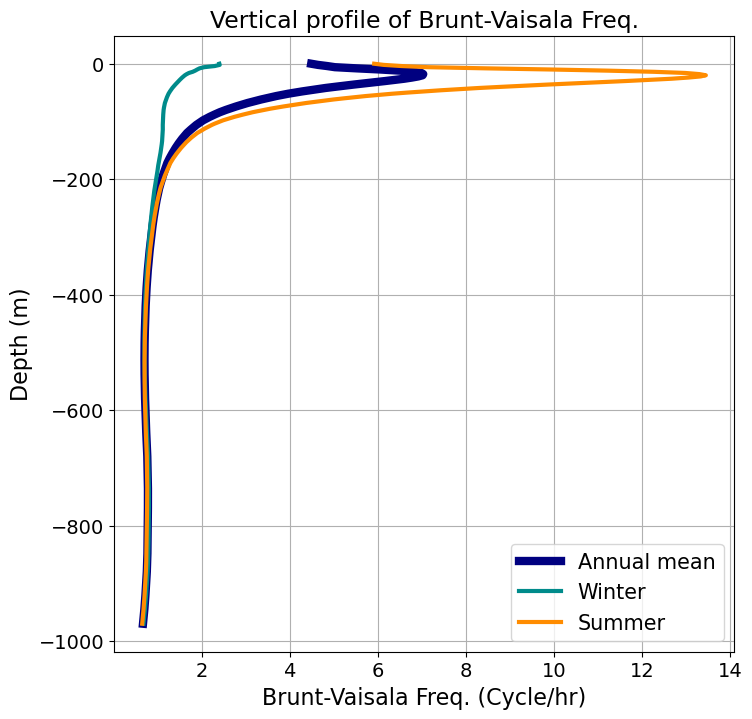

In [11]:
"""
Vertical mean profiles of salinity: annual, winter, summer
"""
outvert="/Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala/vertBVFprof"

figVProf = acIndBruntVaisGraphicUtils.acBruntVaisPlotVProfileAll(SannualMapsNcFileSpec, SsummerMapsNcFileSpec, SwinterMapsNcFileSpec,\
                                                                 maxDepth, zlevs=verticalLevels, csv=True, pth=outvert)

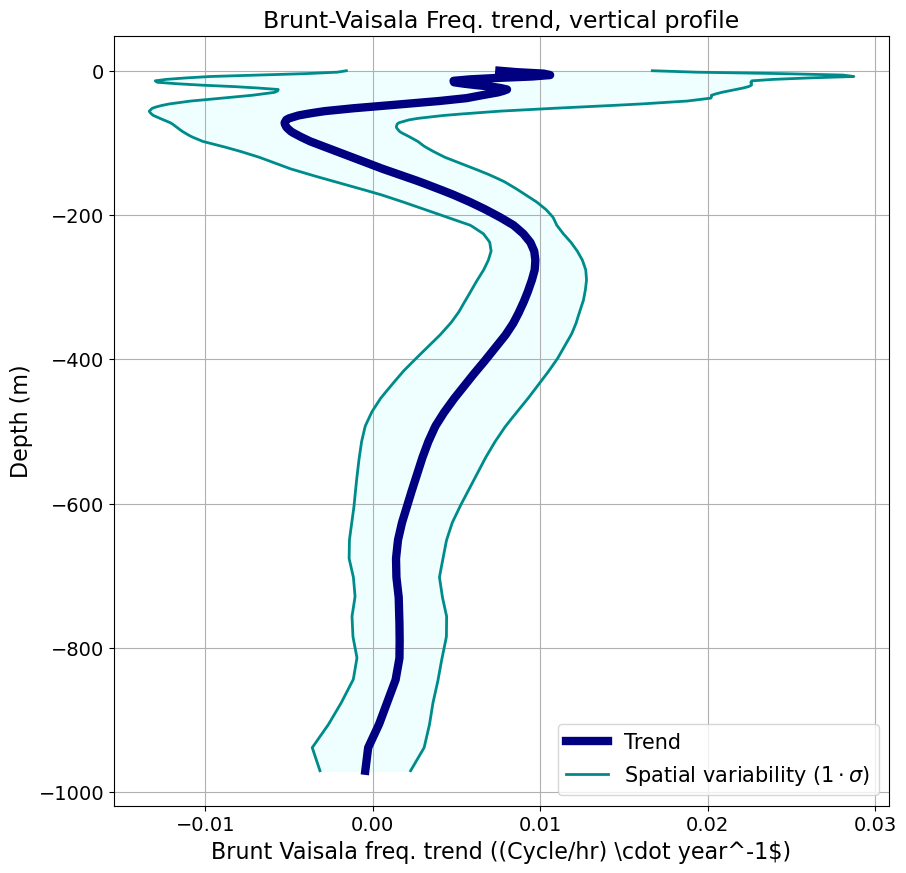

In [12]:
"""
Trend of salinity, vertical profile
"""
figVProfTrend = acIndBruntVaisGraphicUtils.acBruntVaisPlotVProfileTrend(StrendMapNcSpec, maxDepth, zlevs=verticalLevels)